In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('LunarLander-v2',
                       continuous=False,
                       render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 400:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

array([ 0.00686026,  1.421801  ,  0.6948606 ,  0.48357785, -0.0079426 ,
       -0.15739633,  0.        ,  0.        ], dtype=float32)

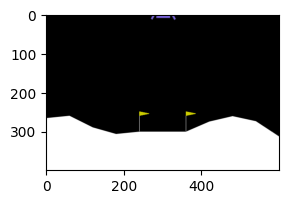

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
env.action_space= Discrete(4)
state= [-1.2488365e-03  1.4045997e+00 -1.2650049e-01 -2.8090703e-01
  1.4537866e-03  2.8654184e-02  0.0000000e+00  0.0000000e+00]
action= 2
next_state= [-0.00238953  1.3991038  -0.11603234 -0.24426208  0.00339713  0.03887122
  0.          0.        ]
reward= 3.8206632939835687
done= False
info= {}


In [4]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = PPO(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=1024,  #运行N步后执行更新,buffer_size=n_steps*环境数量
    batch_size=64,  #采样数据量
    n_epochs=16,  #每次采样后训练的次数
    gamma=0.99,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-186.2003113092622, 127.51220384337816)

In [6]:
# #训练
# model.learn(100_0000, progress_bar=True)

# #保存模型
# model.save('save/1.PPO.Lunar Lander')

In [7]:
#加载模型
model = PPO.load('save/1.PPO.Lunar Lander')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(265.7510707758057, 57.85305098127015)

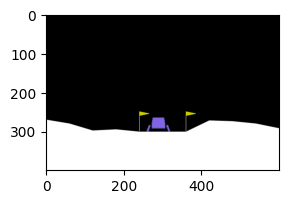

269.0743261571944 162 [1.9535648857281274, 2.1027781425759997, 2.16199896559138, 2.215160996075781, 2.2650470259618203, 2.3085327551518446, 2.3388834755316736, 2.3377030355311774, 2.9992252764444074, 1.5155375724942541, 0.17756842505556847, -1.7851174240369687, -2.287398042555168, -2.36924663018371, -2.362138367441588, -2.4510520838217063, -2.4281164788774263, -2.2443180358797576, -2.1892792346012584, -2.132731770360067, -2.2736083142014523, -2.1096894770403183, -1.933892398327231, -1.7188953089604115, -1.6685296110653667, -1.6460600414626458, -1.6465209810120314, -1.5871558499736977, -1.5276759086796972, -1.46813210459851, -1.4085233447681276, -1.348845255755208, -1.2891413391053277, -1.229403711692271, -1.1696212917637467, -1.2487630542336763, -1.4463144353769326, -1.1479506965648614, -1.0505088542637395, -0.9906119617407967, -0.8196449260621523, -0.6663029947910388, -0.8377871821362521, -0.6347848869889663, -0.6364621743526289, -0.7955001359614176, -0.6108429692938262, -0.4651523044

In [16]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()